In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lid_driven_cavity import states, operators, postprocessing

In [3]:
def f(x, y):
    return np.sin(4*np.pi*x)*(1.0+np.exp(y))

def dfdx(x, y):
    return 4*np.pi*np.cos(4*np.pi*x)*(1.0+np.exp(y))

def dfdx2(x, y):
    return -16*np.pi**2*np.sin(4*np.pi*x)*(1.0+np.exp(y))

def dfdy(x, y):
    return np.sin(4*np.pi*x)*np.exp(y)

def dfdy2(x, y):
    return np.sin(4*np.pi*x)*np.exp(y)

def f_laplace(x, y):
    return dfdx2(x, y) + dfdy2(x, y)

In [4]:
Ns = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
errors = []
for N in Ns:

    # Set up domain
    Nx, Ny = N, N
    x = np.linspace(0.0, 1.0, Ny)
    y = np.linspace(0.0, 1.0, Nx)
    y = np.flip(y)
    xx, yy = np.meshgrid(x,y)

    # Numerical solution
    zz = f(xx, yy)
    laplace_numerical = operators.compute_laplace(states.State(zz, Nx=Nx, Ny=Ny))

    # Analytical solution
    laplace_analytical = states.State(f_laplace(xx, yy), Nx, Ny)

    # Interior points only
    laplace_analytical.strip_boundaries()
    laplace_numerical.strip_boundaries()

    # Error convergence rate
    errors.append(postprocessing.relative_frobenius_error(laplace_numerical.get_matrix(), laplace_analytical.get_matrix()))

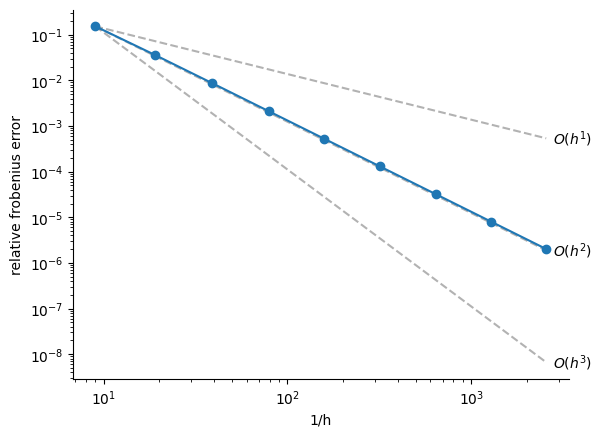

In [5]:
postprocessing.plot_convergence(1.0/(np.array(Ns)-1.0), errors, [1, 2, 3])